In [105]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path template and years to load
file_path_template = "data/load/Native_Load_{}.xlsx"
years = range(2018, 2025)

# Initialize an empty list to store DataFrames
df_list = []

# Loop through the years, read the corresponding files, and append to the list
for year in years:
    file_path = file_path_template.format(year)
    
    if year >= 2021:
        df_year = pd.read_excel(file_path)[["Hour Ending", "ERCOT"]]
        df_year.rename(columns={"Hour Ending": "HourEnding"}, inplace=True)
    else:
        df_year = pd.read_excel(file_path)[["HourEnding", "ERCOT"]]
    
    df_year['Year'] = year  # Add a column to distinguish the year
    df_list.append(df_year)

# Concatenate all DataFrames into a single DataFrame
df_load_all_years = pd.concat(df_list, ignore_index=True)
df_load_all_years

,HourEnding,ERCOT,Year
0,01/01/2018 01:00,50567.069682,2018
1,01/01/2018 02:00,50617.087977,2018
2,01/01/2018 03:00,50694.300087,2018
3,01/01/2018 04:00,50999.591693,2018
4,01/01/2018 05:00,51723.732017,2018
...,...,...,...
56946,06/30/2024 20:00,77241.862264,2024
56947,06/30/2024 21:00,74375.231391,2024
56948,06/30/2024 22:00,72384.697628,2024
56949,06/30/2024 23:00,69044.083150,2024


In [138]:
df_load_day = pd.DataFrame()
df_load_day["date"] = pd.to_datetime(df_load_all_years.HourEnding.str.slice(0,10))
df_load_day["year"] = df_load_all_years.Year
df_load_day["month"] = df_load_day.date.dt.month
df_load_day["load"] = df_load_all_years.ERCOT

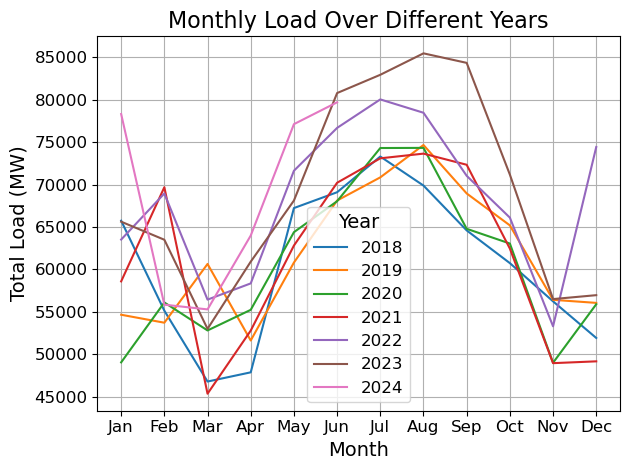

In [220]:
df_load_month = df_load_day.groupby(["year","month"])["load"].max().reset_index()
sns.lineplot(data=df_load_month, x='month', y='load', hue='year', palette='tab10')

# Customize the plot
plt.title('Monthly Load Over Different Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Load (MW)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

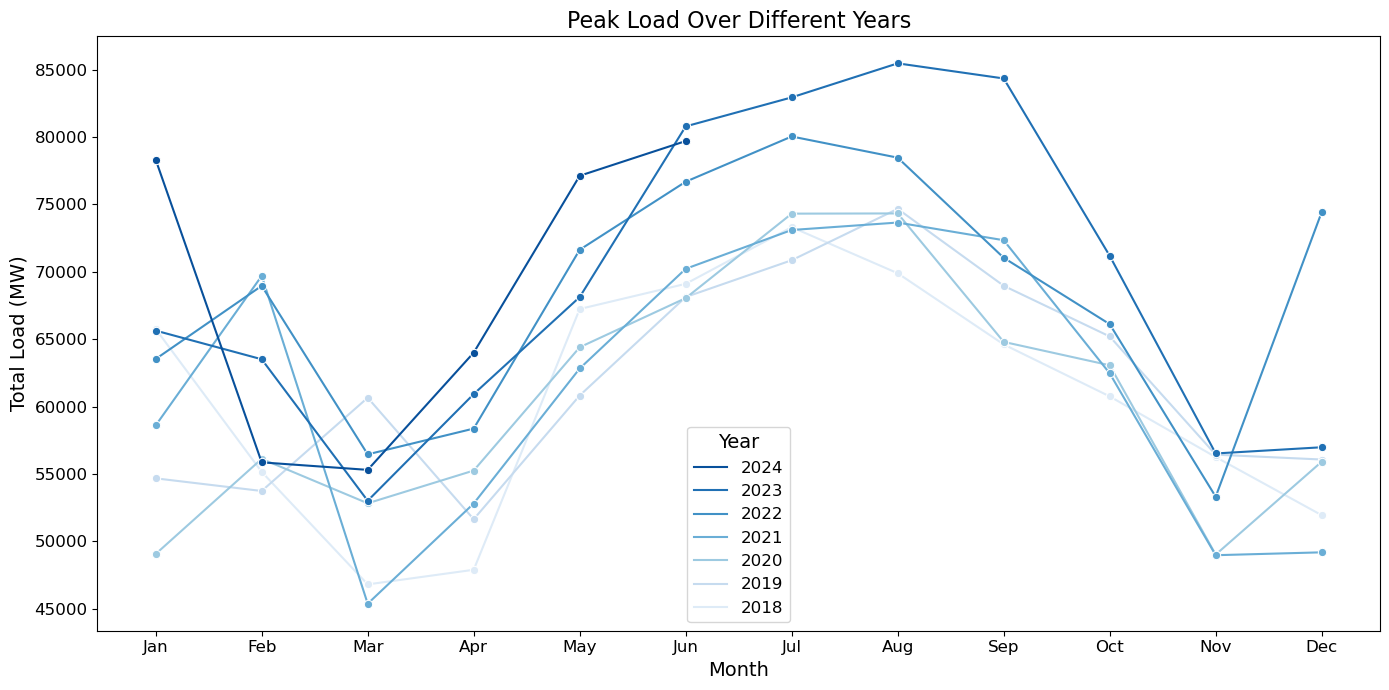

In [226]:
# Sort data by Year to get the correct order in the legend
df_load_month = df_load_month.sort_values('year')

# Create a custom color palette with increasingly darker shades of blue
palette = sns.color_palette("Blues", n_colors=len(df_load_month['year'].unique()))

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_load_month, x='month', y='load', hue='year', palette=palette, marker='o')

# Customize the plot
plt.title('Peak Load Over Different Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Load (MW)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Invert the legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Year', fontsize=12, title_fontsize=14)

# Show plot
plt.show()